# Orbit Integrations (and more)
Jack Hong

In [115]:
from __future__ import division
from galpy.orbit import Orbit
from galpy.potential import SpiralArmsPotential, MWPotential2014
import numpy as np
import matplotlib.pyplot as plt

In [143]:
from galpy.potential import evaluateDensities

def rel_den_perturbation(amp):
    sp = SpiralArmsPotential(amp=amp)
    mp = MWPotential2014
    nRs = 5
    nzs = 5
    nphis = 50
    Rs = np.linspace(0.5, 1, nRs)
    zs = np.linspace(-.5, .5, nzs)
    phis = np.linspace(0, np.pi/2, nphis)
    r = np.zeros(nRs * nzs)
    counter = 0
    for ii in range(nRs):
        for jj in range(nzs):
            sp_dens = np.zeros(nphis)
            for kk in range(nphis):       
                sp_dens[kk] = evaluateDensities(sp, Rs[ii], zs[jj], phis[kk])
            
            mp_dens = evaluateDensities(mp, Rs[ii], zs[jj])
            r[counter] = max(sp_dens) / mp_dens
            counter = counter + 1
            
    avg = np.mean(r)
    stddev = np.std(r)
    return avg, stddev, r

rel_den_perturbation(.6)
    

(0.29864661967970602,
 0.21407064324205599,
 array([ 0.37348584,  0.53732732,  0.02832714,  0.53732732,  0.37348584,
         0.03902513,  0.03696038,  0.00185748,  0.03696038,  0.03902513,
         0.35118832,  0.56342039,  0.04068221,  0.56342039,  0.35118832,
         0.33641609,  0.55564379,  0.04597173,  0.55564379,  0.33641609,
         0.31878305,  0.53734639,  0.05013355,  0.53734639,  0.31878305]))

In [144]:
sp = SpiralArmsPotential(amp=0.6)  # amp <= 3 for positive density
mp = MWPotential2014
pot = [sp] + mp

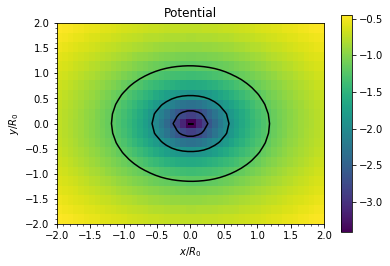

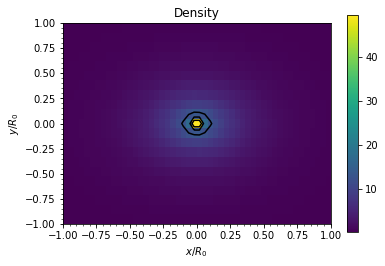

In [145]:
from galpy.potential import plotPotentials, plotDensities
pot_plt = plotPotentials(pot, xy=True, rmin=-2, rmax=2, zmin=-2, zmax=2, ncontours=5, nrs=50)
pot_plt.colorbar = plt.colorbar(pot_plt)
pot_plt.set_cmap('viridis')
plt.title('Potential')

den_plt = plotDensities(pot, xy=True, rmin=-1, rmax=1, zmin=-1, zmax=1, ncontours=5, nrs=50)
den_plt.colorbar = plt.colorbar(den_plt)
den_plt.set_cmap('viridis')
plt.title('Density')
plt.show()

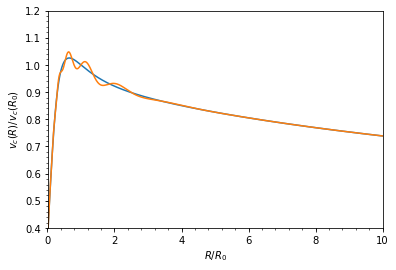

In [146]:
from galpy.potential import plotRotcurve
plotRotcurve(mp, Rrange=[0.01,10.], grid=1001, phi=0, yrange=[0.4,1.2])
plotRotcurve(pot, Rrange=[0.01,10.], grid=1001, phi=0, yrange=[0.4,1.2], overplot=True)

plt.show()

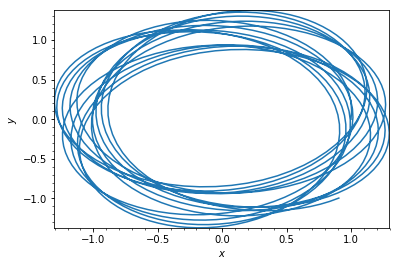

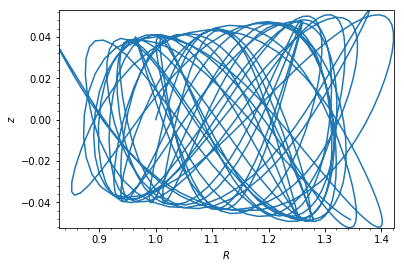

In [147]:
orb = Orbit(vxvv=[1, 0.1, 1.1, 0, 0.1, 0])
ts = np.linspace(0,100,1000)
orb.integrate(ts, pot, method='odeint')
orb.plot(d1='x', d2='y')
orb.plot()
plt.show()